# Praticando o algorítimo Reconhecimento Facial

## Bibliotecas

In [1]:
# Libs
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

In [2]:
# Criando a função de reconhecimento
def reconhece_face(imagem):
    # Criando o reconhecedor
    reconhecedor = cv2.face.LBPHFaceRecognizer_create()
    reconhecedor.read("../classificador_lbph.yml")

    # Carregando uma imagem de teste
    image_teste = imagem

    # convertendo a imagem
    imagem = Image.open(image_teste).convert('L')

    # transformando a imagem em um array
    imagem_array = np.asarray(imagem, 'uint8')

    # Previsão
    idprevisto, _ = reconhecedor.predict(imagem_array)

    # Visualizando o id correto
    idcorreto = int(os.path.split(image_teste)[1].split(".")[0].replace('subject', ''))

    # Convertendo a imagem para RGB
    img_cinzaRGB = cv2.cvtColor(imagem_array, cv2.COLOR_GRAY2RGB)

    # Adicionando o texto diretamente na imagem usando OpenCV
    font_scale = 0.5
    font = cv2.FONT_HERSHEY_COMPLEX_SMALL

    # Definindo as coordenadas iniciais (pode ajustar conforme necessário)
    x = 10
    y = 30

    cv2.putText(img_cinzaRGB, f'P: {idprevisto}', (x, y), font, font_scale, (0, 255, 0), 1)
    cv2.putText(img_cinzaRGB, f'C: {idcorreto}', (x, y + 20), font, font_scale, (0, 255, 0), 1)

    # Visualizando a imagem com matplotlib
    plt.figure(figsize=(10, 10))
    plt.title('Imagem Cinza')
    plt.imshow(img_cinzaRGB)
    plt.axis('off')
    plt.show()

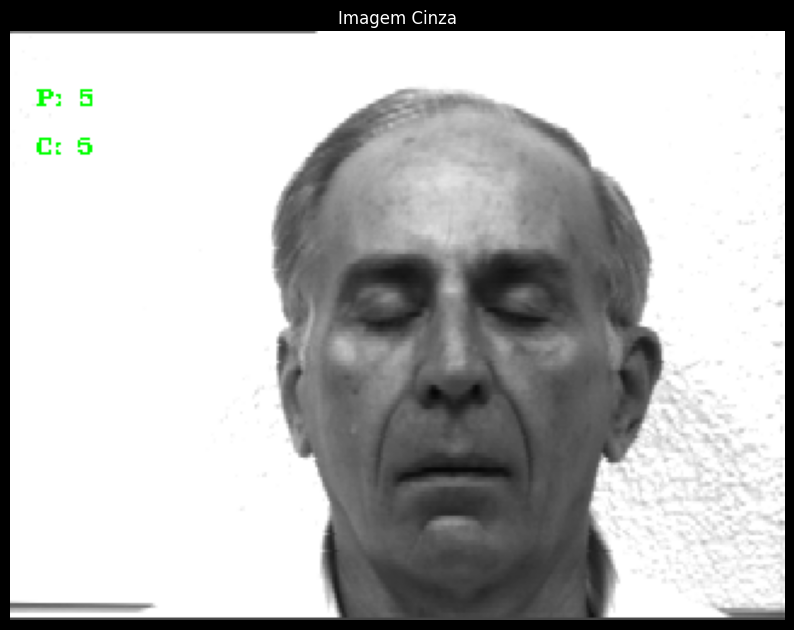

In [3]:
# Testando a função 
reconhece_face('../data/yalefaces/test/subject05.sleepy.gif')